In [11]:
%matplotlib inline
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [7]:
npoints = 2000
lons = np.random.uniform(125, 150, npoints)
lats = np.random.uniform(28, 48, npoints)
data = np.random.uniform(0.5, 1.5, npoints)

In [8]:
lon_i  = np.linspace(125, 150, (150-125)+1)
lat_i = np.linspace(28, 48, (48 - 28)+1)

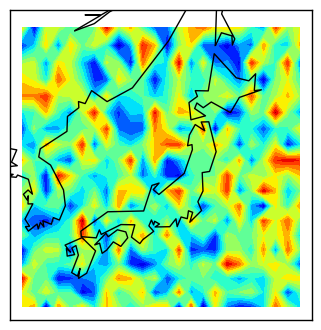

In [9]:
fig, ax = plt.subplots()
m = Basemap(projection='merc'
        , llcrnrlat=28        # the LOWER LEFT corner of latitude
        , urcrnrlat=48        # the UPPER RIGHT corner of latitude
        , llcrnrlon=125      # the LOWER LEFT corner of longitude
        , urcrnrlon=150
        , resolution='c'
        , ax=ax)
m.drawcoastlines()

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

zi = griddata(x, y, data, xi, yi, interp='linear')

ax.contourf(xi, yi, zi, 15)

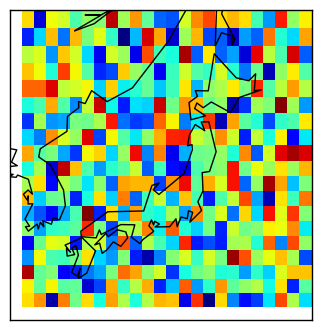

In [10]:
fig, ax = plt.subplots()
m = Basemap(projection='merc'
        , llcrnrlat=28        # the LOWER LEFT corner of latitude
        , urcrnrlat=48        # the UPPER RIGHT corner of latitude
        , llcrnrlon=125      # the LOWER LEFT corner of longitude
        , urcrnrlon=150
        , resolution='c'
        , ax=ax)
m.drawcoastlines(zorder=10)

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

zi = griddata(x, y, data, xi, yi, interp='linear')

ax.pcolormesh(xi, yi, zi)

In [12]:
df = pd.read_csv('data/ANSS_1976_2002.txt', delim_whitespace=True)

/home/max/anaconda2/envs/python_for_scientists/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df = df[df.Lon.between(125, 150) & df.Lat.between(28, 48)].copy()

In [15]:
df.describe()

,Lat,Lon,Depth,Mag,RMS,Event,ID
count,8715.000000,8715.000000,8715.000000,8715.000000,8.715000e+03,0.0,0.0
mean,37.952769,142.071596,70.992725,4.902605,1.988384e+11,NaN,NaN
std,5.564256,4.994088,96.024711,0.392082,7.188478e+08,NaN,NaN
min,28.000000,125.684000,1.000000,4.500000,1.976010e+11,NaN,NaN
25%,33.534500,139.573500,33.000000,4.600000,1.982101e+11,NaN,NaN
50%,38.819000,141.923000,33.000000,4.800000,1.989022e+11,NaN,NaN
75%,43.326000,146.467000,62.050000,5.100000,1.994123e+11,NaN,NaN
max,47.967000,149.993000,588.000000,8.100000,2.000081e+11,NaN,NaN


In [41]:
eq_count = df.groupby(['Lat', 'Lon']).apply(round).groupby(['Lat','Lon']).count().reset_index()

In [42]:
# npoints = 2000
# lons = np.random.uniform(125, 150, npoints)
# lats = np.random.uniform(28, 48, npoints)
# data = np.random.uniform(0.5, 1.5, npoints)
# lon_i  = np.linspace(125, 150, (150-125)+1)
# lat_i = np.linspace(28, 48, (48 - 28)+1)
data = eq_count.Mag.values
lons = eq_count.Lon.values
lats = eq_count.Lat.values
# data = df.Mag.values
lon_i = np.linspace(125, 150, (150 - 125) + 1)
lat_i = np.linspace(28, 48, (48 - 28) + 1)

In [43]:
lons.shape

(275,)

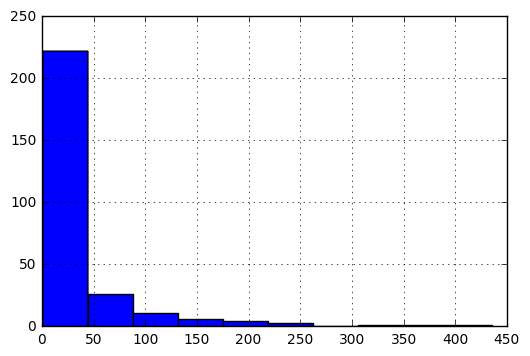

In [45]:
eq_count.Mag.hist()

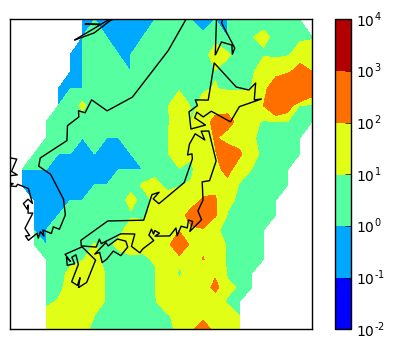

In [54]:
from matplotlib import ticker
fig, ax = plt.subplots()
m = Basemap(projection='merc'
        , llcrnrlat=28        # the LOWER LEFT corner of latitude
        , urcrnrlat=48        # the UPPER RIGHT corner of latitude
        , llcrnrlon=125      # the LOWER LEFT corner of longitude
        , urcrnrlon=150
        , resolution='c'
        , ax=ax)
m.drawcoastlines()

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

zi = griddata(x, y, data, xi, yi, interp='linear')

cbar = ax.contourf(xi, yi, zi, locator=ticker.LogLocator())
fig.colorbar(cbar)

/home/max/anaconda2/envs/python_for_scientists/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


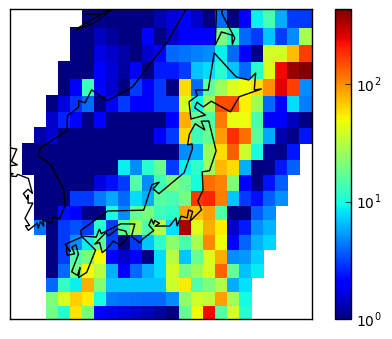

In [57]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
m = Basemap(projection='merc'
        , llcrnrlat=28        # the LOWER LEFT corner of latitude
        , urcrnrlat=48        # the UPPER RIGHT corner of latitude
        , llcrnrlon=125      # the LOWER LEFT corner of longitude
        , urcrnrlon=150
        , resolution='c'
        , ax=ax)
m.drawcoastlines()

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

zi = griddata(x, y, data, xi, yi, interp='linear')

cbar = ax.pcolormesh(xi, yi, zi, norm=LogNorm())
fig.colorbar(cbar)

# plotting without interpolation

In [62]:
# data = bdf.mean_error.values
# lons = bdf.lon.values
# lats = bdf.lat.values
# lon_i = np.linspace(126.00, 135.00, 901)
# lat_i = np.linspace(28.00, 35.00, 701)

# new_index = [x for x in product(lon_i, lat_i)]
# bdata = bdf.set_index(['lon', 'lat']).reindex(new_index).reset_index()[['lon', 'lat', 'mean_error']].copy()

# zi = bdata.pivot(index='lat', columns='lon', values='mean_error').values

In [65]:
from itertools import product

new_index = [x for x in product(lon_i, lat_i)]

In [69]:
bdata = eq_count.set_index(['Lon', 'Lat']).reindex(new_index).reset_index()[['Lon', 'Lat', 'Mag']].copy()

In [70]:
zi = bdata.pivot(index='Lat', columns='Lon', values='Mag').values

/home/max/anaconda2/envs/python_for_scientists/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


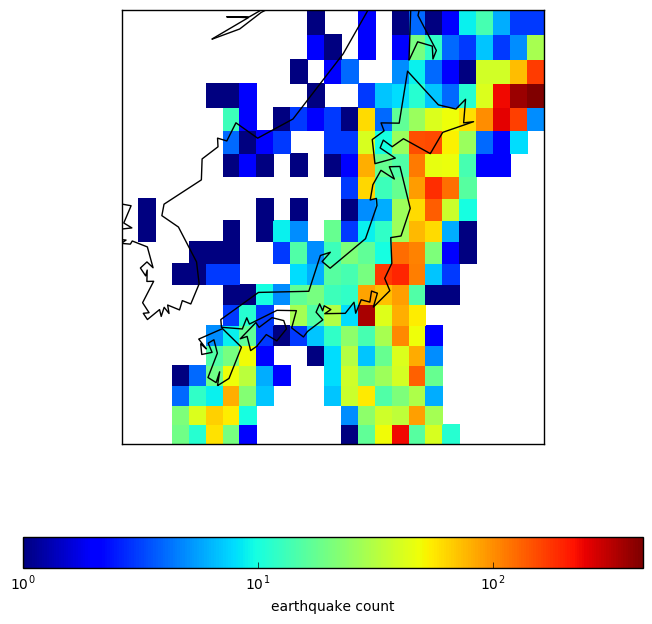

In [77]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(8,8))
m = Basemap(projection='merc'
        , llcrnrlat=28        # the LOWER LEFT corner of latitude
        , urcrnrlat=48        # the UPPER RIGHT corner of latitude
        , llcrnrlon=125      # the LOWER LEFT corner of longitude
        , urcrnrlon=150
        , resolution='c'
        , ax=ax)
m.drawcoastlines()

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)

cbar = ax.pcolormesh(xi, yi, zi, cmap='jet', norm=LogNorm())

fig.colorbar(cbar, label='earthquake count', orientation='horizontal')